In [1]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#investigation
data_reclaims = pd.read_csv('reclaims.csv',sep=';')

In [3]:
df6 = data_reclaims

In [4]:
df6

,Reclaim,Person,Processing time
0,Account closing,Jan sr.,"24,89"
1,IBAN,Marcel,"27,36"
2,Status info,Marcel,"2,65"
3,Matching,Margriet,"23,48"
4,Billing,Kees,"35,92"
...,...,...,...
117,Status info,Henk,"11,76"
118,Matching,Jan sr.,"28,84"
119,Status info,Margriet,"32,61"
120,Status info,Kees,"10,09"


In [5]:
df6['Processing time'] = df6['Processing time'].str.replace(',', '.')
df6['Processing time'] = df6['Processing time'].astype(float)

In [6]:
df6.describe()

,Processing time
count,122.000000
mean,24.835164
std,13.876383
min,0.050000
25%,11.610000
50%,26.770000
75%,32.670000
max,58.530000


In [7]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reclaim          122 non-null    object 
 1   Person           122 non-null    object 
 2   Processing time  122 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


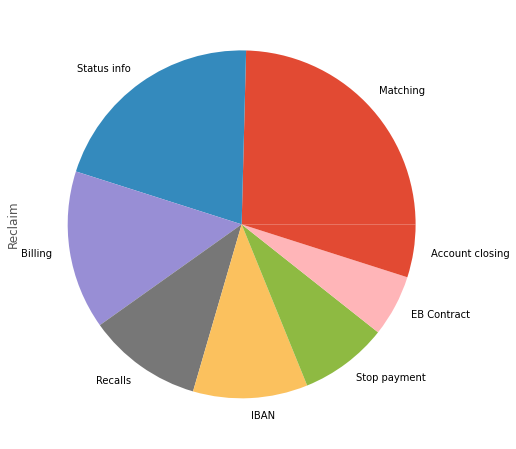

In [8]:
#gráfico de pizza sem legenda
df6["Reclaim"].value_counts().plot.pie(figsize=(10,8))
plt.show()

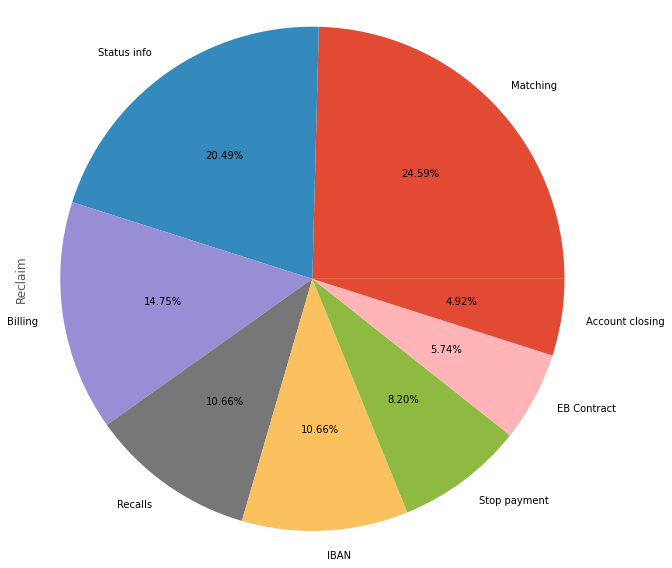

In [9]:
#gráfico de pizza com legenda
df6.Reclaim.value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10, 10))
plt.axis('equal')  # Para deixar o gráfico redondo
plt.show()

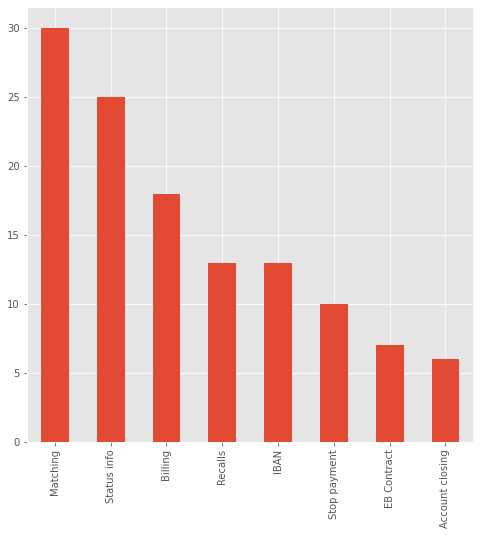

In [10]:
#gráfico de pizza com legenda
df6.Reclaim.value_counts().plot(kind='bar', figsize=(8, 8))
#plt.axis('equal')  # Para deixar o gráfico redondo
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


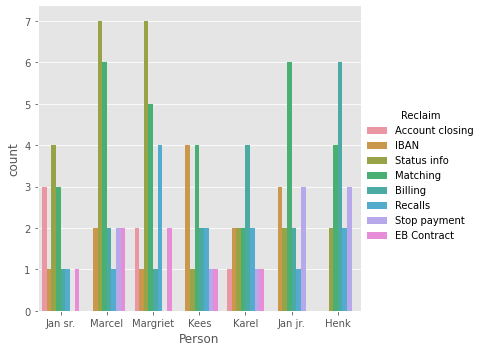

In [11]:
# Distribuição da classe dividida por pessoa.
sns.factorplot('Person', data=df6, hue='Reclaim', kind='count')
plt.show()

In [12]:
df6.Reclaim.value_counts()

Matching           30
Status info        25
Billing            18
Recalls            13
IBAN               13
Stop payment       10
EB Contract         7
Account closing     6
Name: Reclaim, dtype: int64

In [13]:
pd.crosstab(df6["Reclaim"],df6["Person"],margins=True)


Person,Henk,Jan jr.,Jan sr.,Karel,Kees,Marcel,Margriet,All
Reclaim,,,,,,,,
Account closing,0,0,3,1,0,0,2,6
Billing,6,2,1,4,2,2,1,18
EB Contract,0,0,1,1,1,2,2,7
IBAN,0,3,1,2,4,2,1,13
Matching,4,6,3,2,4,6,5,30
Recalls,2,1,1,2,2,1,4,13
Status info,2,2,4,2,1,7,7,25
Stop payment,3,3,0,1,1,2,0,10
All,17,17,14,15,15,22,22,122


In [14]:
pd.crosstab(df6["Reclaim"],df6["Person"],margins=True, normalize='index')


Person,Henk,Jan jr.,Jan sr.,Karel,Kees,Marcel,Margriet
Reclaim,,,,,,,
Account closing,0.000000,0.000000,0.500000,0.166667,0.000000,0.000000,0.333333
Billing,0.333333,0.111111,0.055556,0.222222,0.111111,0.111111,0.055556
EB Contract,0.000000,0.000000,0.142857,0.142857,0.142857,0.285714,0.285714
IBAN,0.000000,0.230769,0.076923,0.153846,0.307692,0.153846,0.076923
Matching,0.133333,0.200000,0.100000,0.066667,0.133333,0.200000,0.166667
Recalls,0.153846,0.076923,0.076923,0.153846,0.153846,0.076923,0.307692
Status info,0.080000,0.080000,0.160000,0.080000,0.040000,0.280000,0.280000
Stop payment,0.300000,0.300000,0.000000,0.100000,0.100000,0.200000,0.000000
All,0.139344,0.139344,0.114754,0.122951,0.122951,0.180328,0.180328


In [15]:
#Grafico de pareto
df_pareto = pd.read_csv('pareto.csv',sep=';')

In [16]:
df_pareto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Stops     90 non-null     int64 
 1   Duration  90 non-null     object
 2   Cause     90 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [17]:
df_pareto['Duration'] = df_pareto['Duration'].str.replace(',', '.')


In [18]:
#Converte de um tipo para o outro e com o parametro coerce, ele ignora possiveis erros
#tais como nao haver um valor, uma sujeira no dataframe entre outros.
df_pareto['Duration'] = pd.to_numeric(df_pareto['Duration'], errors='coerce')

In [19]:
df_pareto

,Stops,Duration,Cause
0,1,30.0,Deviation in dimensions
1,2,45.0,Break
2,3,NaN,Deviation in dimensions
3,4,40.0,Problem with dough
4,5,55.0,Break
...,...,...,...
85,86,40.0,Break
86,87,5.0,Problem with dough
87,88,40.0,Break
88,89,44.8,Break


In [20]:
df_pareto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stops     90 non-null     int64  
 1   Duration  87 non-null     float64
 2   Cause     90 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [21]:
df7 = df_pareto

In [22]:
#df7 = df7.sort_values(by='Duration',ascending=False)

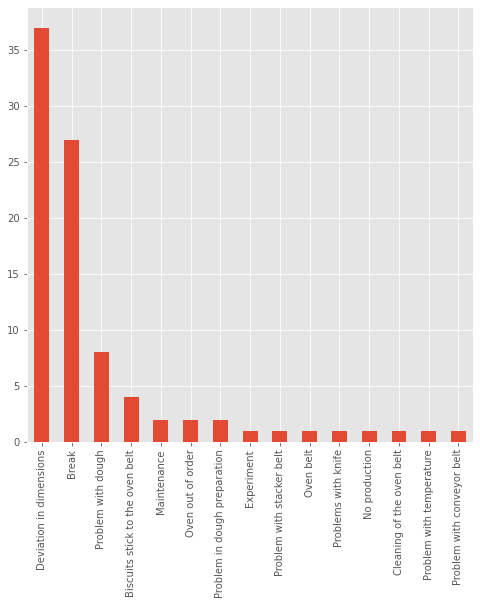

In [23]:
#gráfico de pizza com legenda
df7.Cause.value_counts().plot(kind='bar', figsize=(8, 8))
#plt.axis('equal')  # Para deixar o gráfico redondo
plt.show()

In [24]:
df8 = df7

In [25]:
df9 = df8['Cause'].value_counts().reset_index()

In [26]:
df9["soma"] = df9["Cause"].cumsum()/df9["Cause"].sum()*100

In [27]:
df9 = df9.set_index("index")

In [28]:
from matplotlib.ticker import PercentFormatter

In [29]:
df9 = df9.sort_values(by='Cause',ascending=False)

In [30]:
df9

,Cause,soma
index,,
Deviation in dimensions,37,41.111111
Break,27,71.111111
Problem with dough,8,80.000000
Biscuits stick to the oven belt,4,84.444444
Maintenance,2,86.666667
Oven out of order,2,88.888889
Problem in dough preparation,2,91.111111
Experiment,1,92.222222
Problem with stacker belt,1,93.333333


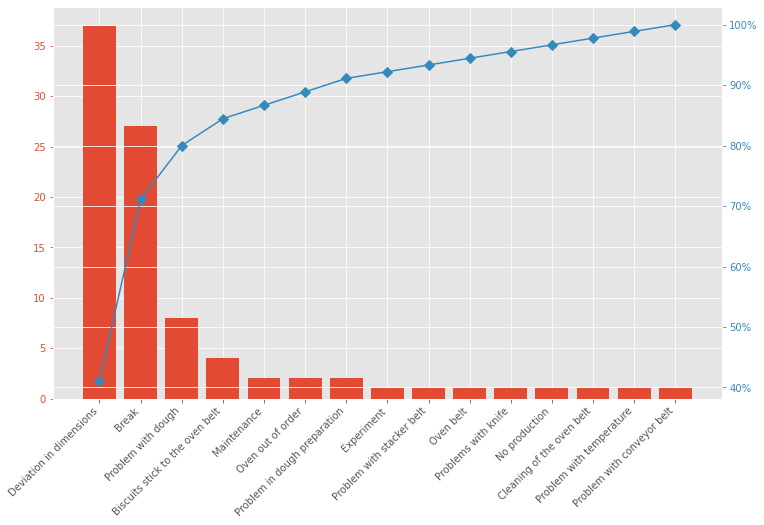

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df9.index, df9["Cause"], color="C0")
ax2 = ax.twinx()
ax2.plot(df9.index, df9["soma"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
fig.autofmt_xdate(rotation=45)
plt.show()

In [32]:
data_caffeine2 = pd.read_csv('caffeine2.csv',sep=';')

In [34]:
data_caffeine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Measurement       50 non-null     int64 
 1   Caffeine Content  50 non-null     object
 2   Extraction time   50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [35]:
df10 = data_caffeine2

In [36]:
df10['Caffeine Content'] = df10['Caffeine Content'].str.replace(',','.')
df10['Extraction time'] = df10['Extraction time'].str.replace(',','.')
df10['Extraction time'] = df10['Extraction time'].astype(float64)
df10['Caffeine Content'] = df10['Caffeine Content'].astype(float64)


In [37]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Measurement       50 non-null     int64  
 1   Caffeine Content  50 non-null     float64
 2   Extraction time   50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


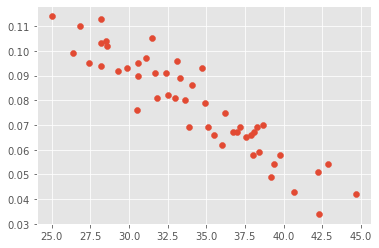

In [38]:
plt.scatter('Extraction time', 'Caffeine Content', data=df10)
plt.show()

In [39]:
df_caffeine3 = pd.read_csv('caffeine3.csv', sep=';')

In [40]:
df_caffeine3.head()

,Caffeine%,Extractor nr.,Batch nr.
0,"0,0532",1,718
1,"0,0570",2,718
2,"0,1128",3,718
3,"0,0525",1,718
4,"0,0832",2,718


In [41]:
df_caffeine3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Caffeine%      60 non-null     object
 1   Extractor nr.  60 non-null     int64 
 2   Batch nr.      60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [42]:
df_caffeine3['Caffeine%'] = df_caffeine3['Caffeine%'].str.replace(',','.')

In [43]:
df_caffeine3['Caffeine%'] = df_caffeine3['Caffeine%'].astype(float64)

In [44]:
df_caffeine3_bkp = df_caffeine3

In [45]:
#cols = ['Caffeine%','Extractor nr.']

In [46]:
#df_caffeine3 = df_caffeine3.drop(columns=['col3'])

In [47]:
df_caffeine3

,Caffeine%,Extractor nr.,Batch nr.
0,0.0532,1,718
1,0.0570,2,718
2,0.1128,3,718
3,0.0525,1,718
4,0.0832,2,718
5,0.1170,3,718
6,0.0572,1,719
7,0.0727,2,719
8,0.1215,3,719
9,0.0379,1,719


In [48]:
col = ['Caffeine%' , 'Extractor nr.']

In [49]:
boxplot2 = df_caffeine3[col]

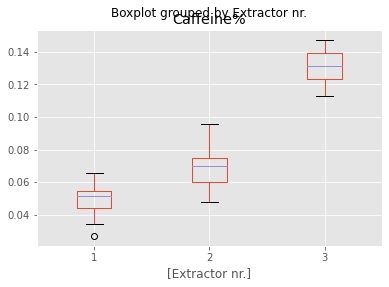

In [50]:
boxplot = boxplot2.boxplot(by='Extractor nr.')

In [51]:
df_inv = pd.read_csv("investigation.csv", sep=';')

In [59]:
df_inv2 = df_inv 

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
0,GR0400250011,BSABESBB,AN,"29,73","20,80","8,93","0,00",3
1,GR0400250015,BDCCANCU,OX,"6,83","5,54","1,29","0,00",2
2,GR0400250022,CITIUS33,NU,"6,86","6,86","0,00","0,00",0
3,GR0400250023,BOFMCAM2,NU,"6,93","4,77","2,16","0,00",1
4,GR0400250024,BFICCUHH,OX,"19,81","0,28","19,52","0,00",4
...,...,...,...,...,...,...,...,...
516,GR0400650518,CRLYFRPP,DD,"0,04","0,04","0,00","0,00",0
517,GR0400650519,CRLYFRPP,DD,"1,04","1,04","0,00","0,00",0
518,GR0400650520,RBTTSRPA,OX,"1,82","0,77","1,05","0,00",1
519,GR0400650523,TRMEZWHA,WX,"2,78","1,46","0,00","1,32",0


In [58]:
df_inv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Case number                   521 non-null    object
 1   Sender-id                     521 non-null    object
 2   Type                          521 non-null    object
 3   Total time                    521 non-null    object
 4   Time open                     521 non-null    object
 5   Time pending                  521 non-null    object
 6   Time closed                   521 non-null    object
 7   Number of pending iterations  521 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 32.7+ KB


In [60]:
cols2 = ['Total time','Time open', 'Time pending','Time closed']

In [79]:
df_inv2[cols2[0]] = df_inv2[cols2[0]].str.replace(',','.')

In [89]:
x = 0
while x < 4:
    df_inv2[cols2[x]] = df_inv2[cols2[x]].astype(float64)
    x+= 1


In [90]:
df_inv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Case number                   521 non-null    object 
 1   Sender-id                     521 non-null    object 
 2   Type                          521 non-null    object 
 3   Total time                    521 non-null    float64
 4   Time open                     521 non-null    float64
 5   Time pending                  521 non-null    float64
 6   Time closed                   521 non-null    float64
 7   Number of pending iterations  521 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 32.7+ KB


In [93]:
df_inv2['Total time'].describe()

count    521.000000
mean       9.422342
std       12.660866
min        0.000000
25%        1.040000
50%        4.070000
75%       11.850000
max       59.800000
Name: Total time, dtype: float64

In [98]:
df_inv2['Time open'].describe()

count    521.000000
mean       2.891420
std        3.076626
min        0.000000
25%        0.700000
50%        2.100000
75%        4.250000
max       23.390000
Name: Time open, dtype: float64

In [99]:
import numpy as np

In [105]:
days = np.where(df_inv2['Time open']>=10)

In [111]:
print(days)

(array([  0,  10,  73, 120, 138, 150, 170, 253, 300, 343, 354, 431],
      dtype=int64),)


In [120]:
df_inv2.isnull().sum()

Case number                     0
Sender-id                       0
Type                            0
Total time                      0
Time open                       0
Time pending                    0
Time closed                     0
Number of pending iterations    0
dtype: int64

In [126]:
tempo15 = df_inv2[df_inv2["Time open"] <= 15]

In [128]:
tempo15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 1 to 520
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Case number                   516 non-null    object 
 1   Sender-id                     516 non-null    object 
 2   Type                          516 non-null    object 
 3   Total time                    516 non-null    float64
 4   Time open                     516 non-null    float64
 5   Time pending                  516 non-null    float64
 6   Time closed                   516 non-null    float64
 7   Number of pending iterations  516 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 36.3+ KB


In [125]:
df_inv2

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
0,GR0400250011,BSABESBB,AN,29.73,20.80,8.93,0.00,3
1,GR0400250015,BDCCANCU,OX,6.83,5.54,1.29,0.00,2
2,GR0400250022,CITIUS33,NU,6.86,6.86,0.00,0.00,0
3,GR0400250023,BOFMCAM2,NU,6.93,4.77,2.16,0.00,1
4,GR0400250024,BFICCUHH,OX,19.81,0.28,19.52,0.00,4
...,...,...,...,...,...,...,...,...
516,GR0400650518,CRLYFRPP,DD,0.04,0.04,0.00,0.00,0
517,GR0400650519,CRLYFRPP,DD,1.04,1.04,0.00,0.00,0
518,GR0400650520,RBTTSRPA,OX,1.82,0.77,1.05,0.00,1
519,GR0400650523,TRMEZWHA,WX,2.78,1.46,0.00,1.32,0


In [129]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_context("paper",font_scale=2)
sns.set_style("white")

In [131]:
tempo15

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
1,GR0400250015,BDCCANCU,OX,6.83,5.54,1.29,0.00,2
2,GR0400250022,CITIUS33,NU,6.86,6.86,0.00,0.00,0
3,GR0400250023,BOFMCAM2,NU,6.93,4.77,2.16,0.00,1
4,GR0400250024,BFICCUHH,OX,19.81,0.28,19.52,0.00,4
5,GR0400250025,PNCCUS33,AN,5.70,5.70,0.00,0.00,0
...,...,...,...,...,...,...,...,...
516,GR0400650518,CRLYFRPP,DD,0.04,0.04,0.00,0.00,0
517,GR0400650519,CRLYFRPP,DD,1.04,1.04,0.00,0.00,0
518,GR0400650520,RBTTSRPA,OX,1.82,0.77,1.05,0.00,1
519,GR0400650523,TRMEZWHA,WX,2.78,1.46,0.00,1.32,0


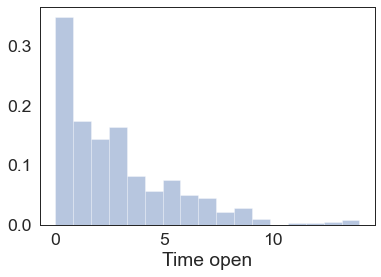

In [135]:
sns.distplot(tempo15['Time open'],hist = True, norm_hist = True, kde=False)

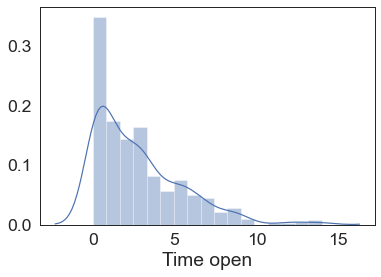

In [138]:
sns.distplot(tempo15['Time open'])

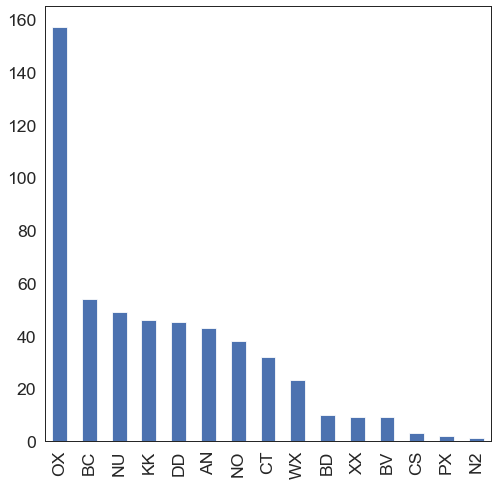

In [139]:
#gráfico de pizza com legenda
df_inv2.Type.value_counts().plot(kind='bar', figsize=(8, 8))
#plt.axis('equal')  # Para deixar o gráfico redondo
plt.show()